# Name: Isha Kumar

# The Sparks Foundation

# Domain: Data Science And Business Analytics

# Task1: Prediction using Supervised ML

In [1]:
#importing the libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [2]:
#Reading The Data
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#To describe the entire data
data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# To check if any value is present in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualization

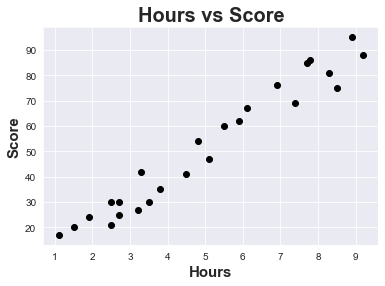

In [11]:
#To plot Scatter Plot
plt.scatter(x=data['Hours'], y=data['Scores'], color = 'black')
sns.set_style('darkgrid')
plt.title('Hours vs Score', fontsize=20, fontweight='bold')
plt.xlabel('Hours', fontsize=15, fontweight='bold')
plt.ylabel('Score',fontsize=15, fontweight='bold')
plt.show()

The above scatter plot indicates positive relationshipship between Scores and Hours studied. 

In [7]:
X= data.iloc[:,:-1].values
print(X)
Y= data.iloc[:,1].values
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Preparing Data and splitting into train and test sets.

In [8]:
#splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [9]:
#Our Data has been Splitted Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


# Training the model

In [13]:
Lin_reg=LinearRegression()
#Fit The Training Data
Lin_reg.fit(X_train,Y_train)

LinearRegression()

In [14]:
#Training the model and finding slope(coefficient) and intercept
print ("Regression Coefficient: ", Lin_reg.coef_)
print ("Regression Intercept: ", Lin_reg.intercept_)

Regression Coefficient:  [9.91065648]
Regression Intercept:  2.018160041434662


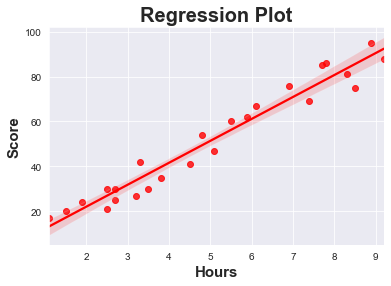

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [15]:
#Plotting the regression line on the scatter plot shown earlier
sns.regplot(x=data['Hours'], y=data['Scores'], color = 'red')
plt.title('Regression Plot', fontsize=20, fontweight='bold')
plt.xlabel('Hours', fontsize=15, fontweight='bold')
plt.ylabel('Score',fontsize=15, fontweight='bold')
plt.show()
data.corr()

# Test Data

In [18]:
#Now Predicting the Scores for test data we have created earlier
y_pred = Lin_reg.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


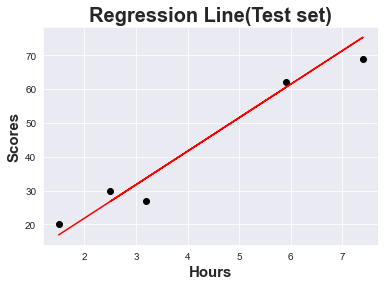

In [30]:
#Plotting line on test data
plt.plot(X_test,y_pred,color='red')
plt.scatter(X_test,Y_test,color='black')
plt.xlabel("Hours",fontsize=15, fontweight = 'bold')
plt.ylabel("Scores",fontsize=15, fontweight = 'bold')
plt.title("Regression Line(Test set)",fontsize=20, fontweight = 'bold')
plt.show()

# Comparing actual and predicted scores

In [23]:
#Visualizing actual y and y pred
Y_test1 = list(Y_test)
prediction=list(y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Accuracy of Model

In [24]:
metrics.r2_score(Y_test,y_pred)

0.9454906892105354

94% indicates the above fitted model is Good model

# Predicting Errors

In [28]:
#Metrics to determine how efficiently the model predicted marks when compared to actual values
print (f"Maximum Error: {metrics.max_error(Y_test, y_pred)}")
print (f"Mean Absolute Error : {metrics.mean_absolute_error(Y_test, y_pred)}")
print (f"Mean Squared Error : {metrics.mean_squared_error(Y_test, y_pred)}")
print (f"Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(Y_test, y_pred))}")

Maximum Error: 6.732260779489835
Mean Absolute Error : 4.183859899002982
Mean Squared Error : 21.598769307217456
Root Mean Squared Error : 4.647447612100373


# Score Prediction

In [29]:
Score_prediction = Lin_reg.predict([[9.25]])
print("Predicted score for a student studying 9.25 hours :",Score_prediction)

Predicted score for a student studying 9.25 hours : [93.69173249]


# From the above results we can say that If a student studies for 9.25 hrs/ day, he will score 93.69 percentage.